# **DIVE INTO CODE COURSE**
## **Sprint Machine Learning Scratch K-Means Clustering**
**Student Name**: Doan Anh Tien<br>
**Student ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

In [435]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import random

---

**Artificial dataset for clustering**

In [628]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, _ = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=0.5, shuffle=True, random_state=0)

X_train, X_val, _ , _ = train_test_split(X_train, _ , train_size=0.7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [629]:
print("Train dataset -- Rows: {}, Columns: {}".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_val.shape[0], X_val.shape[1]))

Train dataset -- Rows: 70, Columns: 2
Test dataset -- Rows: 30, Columns: 2


### **[Problem 1] Determine the initial value of the center point**

In [438]:
def initial_centroied(X, K):
      """
      A function that select initial values of center point from dataset
      
      Parameters
      ----------
      X: The following form of ndarray (n_samples, n_features)
          The training data

      K: int value
          The number of clusters for clustering

      Returns
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The initial values of center points

      """

      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,n-1)]]

      return centroids

**Testing with artificial data**

In [439]:
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Initial centroids: \n{}".format(centroids))

Initial centroids: 
[[-0.40577028 -0.40577028 -0.59426713]
 [ 1.42244728  1.42244728 -0.58061324]]


### **[Problem 3] Allocation to cluster** 

In my implementation, I would like to complete the cluster allocation first by using the euclidean distance to achieve the clustered data

**Euclidean distance formula (vector form)**

$distance(x,y) = \sqrt{(x-y)^2}$

**Euclidean function**

In [303]:
def euclidean(X, Y):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          First point

      Y: The following form of ndarray (n_sample, n_features)
          Second point

      Returns
      ----------
      distance: float value
          The euclidean distance of two points

      """

      return np.sum((X - Y)**2, axis=1)

**Testing with some data**

In [304]:
x_temp = np.array([[0,1],[1,4]])
y_temp = np.array([[2,4],[-1,3]])
print("Distance: {}".format(euclidean(x_temp, y_temp)))

Distance: [13  5]


In [305]:
# Test with our first 20 rows of original data and centroids at cluster 1
distance_array = euclidean(X_train[0:20], centroids[:,0])
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))

Distance: 
[ 4.97661799  0.18864785 10.57307794  3.09967306  3.19250819  0.49863472
  5.76969932  0.11809541  8.83997565  3.05851032  1.43020187  8.74191722
  3.74092383  2.11789266  2.44162199  6.57428585  2.30491392  1.30354639
  3.16862977  4.62781308]
Shape: (20,)


**Euclidean function for all points**

In [306]:
def euclidean_all(X, centroids):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      Returns
      ----------
      euclidean_all: The following form of ndarray (n_samples, n_cluster)
          The euclidean distance of all points respect to each centroids

      """
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

**Testing with some data**

In [307]:
# Test with our original data and centroids
distance_array = euclidean_all(X_train, centroids)
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))

Distance: 
[[4.97661799e+00 5.44365978e+00 1.79297228e-02]
 [1.88647853e-01 1.08810069e+01 3.86843825e+00]
 [1.05730779e+01 2.37993664e-01 3.80168079e+00]
 [3.09967306e+00 2.01863933e+00 2.30116657e+00]
 [3.19250819e+00 1.99782388e+00 1.83090018e+00]
 [4.98634718e-01 9.70272657e+00 2.64953170e+00]
 [5.76969932e+00 8.26005241e+00 4.55623071e-01]
 [1.18095407e-01 1.07894039e+01 4.06587196e+00]
 [8.83997565e+00 4.81643507e-02 4.08573170e+00]
 [3.05851032e+00 2.22647256e+00 1.46342861e+00]
 [1.43020187e+00 4.50680520e+00 1.31025167e+00]
 [8.74191722e+00 3.17899724e-01 2.87315242e+00]
 [3.74092383e+00 3.77871543e+00 1.59027655e-01]
 [2.11789266e+00 3.42129539e+00 1.15605086e+00]
 [2.44162199e+00 2.92284240e+00 1.26470601e+00]
 [6.57428585e+00 8.21939068e+00 5.17318420e-01]
 [2.30491392e+00 2.76768352e+00 2.35260203e+00]
 [1.30354639e+00 1.52547689e+01 4.93174229e+00]
 [3.16862977e+00 2.13955159e+00 3.34796781e+00]
 [4.62781308e+00 6.00960457e+00 5.45428853e-02]
 [2.07504610e+00 4.70598780e+

**Get the minimum distance with respect to one of the cluster**

In [308]:
C = np.argmin(distance_array,axis=1)+1
C

array([3, 1, 2, 2, 3, 1, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 1,
       2, 3, 1, 3, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 2, 1, 3, 2, 1, 2, 3,
       3, 1, 1, 1])

In this first run, we can see that each sample its getting own cluster based on the minimum distance achieved.

**Data allocation**

Next, we will allocate each point to the corresponding cluster based on the minimum distance in the distance list we have found.

In [309]:
def cluster_allocation(X, distance_array):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      """
      
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data

**Testing with some data**

In [310]:
clustered_data = cluster_allocation(X_train, distance_array)

print("Cluster 1 data: \n{}\n".format(clustered_data[1]))
print("Cluster 2 data: \n{}\n".format(clustered_data[2]))
print("Cluster 3 data: \n{}\n".format(clustered_data[3]))

Cluster 1 data: 
[[-0.40577028  1.42244728]
 [-0.50997702  1.08365713]
 [-0.32537738  1.46804142]
 [ 0.82186818  0.29017883]
 [-1.13852983  1.5728722 ]
 [-1.16124566  1.45812487]
 [-0.46561804  1.56872627]
 [-0.41539348  1.46839622]
 [-0.87913165  1.40851966]
 [-0.43696607  1.27564676]
 [-0.73384821  1.25835347]
 [-1.06264793  1.0980047 ]
 [-0.94250215  0.96311889]
 [-0.35515135  1.53528658]
 [-0.89345086  1.78856186]
 [-0.84492094  1.13175832]
 [-1.09774454  1.41541388]
 [-1.11226099  1.31802378]
 [-0.5149972   1.08661835]
 [ 0.0031922   1.67069557]
 [-0.99633953  1.26798964]]

Cluster 2 data: 
[[ 1.27384757 -1.42435122]
 [ 0.92288438  0.06744703]
 [ 1.5039528  -0.99792393]
 [ 1.10784909 -1.17383647]
 [ 1.18785003  0.24011211]
 [ 1.56019408 -1.43274447]
 [ 1.36105727 -1.50145107]
 [ 1.28669727 -1.42498487]
 [ 1.19472523 -1.34256121]
 [ 0.87881633 -0.16863574]
 [ 1.22644725 -1.6960042 ]
 [ 1.53806955 -0.2879462 ]
 [ 1.10516261 -0.96656919]
 [ 1.89757328 -1.38864805]
 [ 2.13489226 -1.62

### **[Problem 4] Movement of the center point**

Next, we will reallocate the centroids of each cluster. This can be done by calculating the mean of all data points in one cluster, and then move the centroid of that cluster to where the mean value falls in.

In [311]:
def centroid_fix(clustered_data, centroids):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      Returns
      ----------
      new_centroids: The following form of ndarray (n_features, n_clusters)
          The new centroids after being fixed
      """
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids

In [312]:
new_centroids = centroid_fix(clustered_data, centroids)
print("Old centroids value: \n{}".format(centroids))
print("New centroids value: \n{}".format(new_centroids))

Old centroids value: 
[[-0.6412768   1.37350238 -0.3631042 ]
 [ 1.31192551 -1.06931381 -0.26783184]]
New centroids value: 
[[-0.6412768   1.37350238 -0.3631042 ]
 [ 1.31192551 -1.06931381 -0.26783184]]


There is no change between the old and new centroids

### **[Problem 2] Creation of a function to obtain SSE**

In [313]:
def SSE(distance_array):
      """
      A function that calculate sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster
      
      Parameters
      ----------
      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      sse: float value
          The sum squared error calculated among cluster
      """

      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse

### **[Problem 5] Repeat**

In [314]:
iter = 5
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Old centroids value: \n{}\n".format(centroids))

# Repeat clustering
for i in range(iter):
    # Get all distance from each point to centroid
    distance_array = euclidean_all(X_train, centroids)
    # Calculate the sum squared error
    sse = SSE(distance_array)
    # Allocate data to every clusters
    clustered_data = cluster_allocation(X_train, distance_array)
    # Update centroid in each cluster
    new_centroids = centroid_fix(clustered_data, centroids)
    print("Iteration {}\n Sum squared error: {}\nNew centroids value: \n{}\n\n".format(i+1, sse, new_centroids))

Old centroids value: 
[[-1.09774454  1.41541388 -0.85726212]
 [-0.42358353  1.65730758 -1.65823181]]

Iteration 1
 Sum squared error: 7982.375624302344
New centroids value: 
[[-0.6830953   0.44552434  1.44253019]
 [ 0.23993778  0.59381966 -1.36418755]]


Iteration 2
 Sum squared error: 5607.451362401538
New centroids value: 
[[-0.84540606  0.392786    1.44889948]
 [ 0.26478454  0.50595565 -1.29243813]]


Iteration 3
 Sum squared error: 5541.357722256053
New centroids value: 
[[-0.85622872  0.41172565  1.44889948]
 [ 0.3058613   0.43407132 -1.29243813]]


Iteration 4
 Sum squared error: 5551.815958197156
New centroids value: 
[[-0.8387524   0.51668592  1.44889948]
 [ 0.41873927  0.21628995 -1.29243813]]


Iteration 5
 Sum squared error: 5582.256400470285
New centroids value: 
[[-0.80400061  0.60140824  1.44889948]
 [ 0.47774589  0.04715513 -1.29243813]]




After the Iteration 3, the centroids are in a fixed position instead of changing.M eanwhile the SSE reached its minimum after Iteration 4

**Ploting the clustering progress**

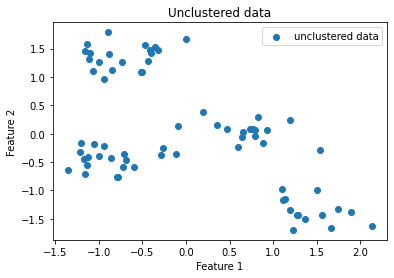

In [315]:
# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

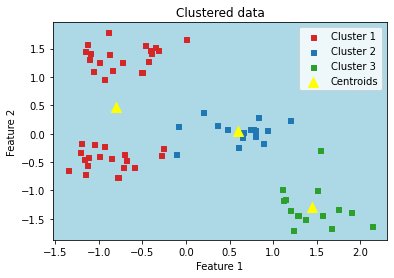

In [316]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(clustered_data[k+1][:,0],
                clustered_data[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(new_centroids[0,:],
            new_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

### **[Problem 6] - [Problem 7]**

In [317]:
from numpy import linalg as LA

We will use the linalg library to return the norm of the difference between the previous centroid and the current centroid. By getting the norm, we will compare it with the tolerance, to see whether or not our centroid has converged for early stopping

In [614]:
class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose


    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        self.cluster_output = {}
        self.cluster_centroid = np.array([]).reshape(X.shape[1], 0)
        self.best_sse = 10e7

        self.poor_division = False

        for init in range(self.n_init):
            centroids = self.initial_centroid(X, self.n_clusters)
            print("\nInitial {}\n".format(init))
            for i in range(self.max_iter):
                # Get all distance from each point to centroid
                prev_centroids = centroids

                distance_array = self.euclidean_all(X, centroids)

                # Calculate the sum squared error
                sse = self.SSE()

                # Allocate data to every clusters
                clustered_data = self.cluster_allocation(X, distance_array)
                
                # Check if there is less cluster compared to the input K
                for key in clustered_data.keys():
                    if len(clustered_data[key]) == 0:
                      print("\nCluster division performed poorly! Skip this clustering . . .")
                      self.poor_division = True

                if self.poor_division == True:
                    break

                # Update centroid in each cluster
                centroids = self.centroid_fix(clustered_data, centroids)

                #if sse < self.best_sse:
                self.best_sse = sse
                self.cluster_output = clustered_data
                self.cluster_centroid = centroids

                if self.verbose == True:
                    if (i % 100 == 0 and i > 0):
                        print("Iteration {}".format(i))

                #if (LA.norm(centroids - prev_centroids) <= self.tol):
                #    print("\nCentroids has reach their convergence! Stop learning . . .")
                #    break


    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """

        distance_array = self.euclidean_all(X, self.cluster_centroid)
        clustered_data = self.cluster_allocation(X, distance_array)

        return clustered_data, self.cluster_centroid


    def initial_centroid(self, X, K):
      """
      A function that select initial values of center point from dataset
      
      Parameters
      ----------
      X: The following form of ndarray (n_samples, n_features)
          The training data

      K: int value
          The number of clusters for clustering

      Returns
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The initial values of center points

      """
      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,len(X)-1)]]

      return centroids


    def euclidean(self, X, Y):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          First point

      Y: The following form of ndarray (n_sample, n_features)
          Second point

      Returns
      ----------
      distance: float value
          The euclidean distance of two points

      """

      return np.sum((X - Y)**2, axis=1)

    
    def euclidean_all(self, X, centroids):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      Returns
      ----------
      euclidean_all: The following form of ndarray (n_samples, n_cluster)
          The euclidean distance of all points respect to each centroids

      """
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = self.euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

    
    def cluster_allocation(self, X, distance_array):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      """
      
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data

    
    def centroid_fix(self, clustered_data, centroids):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      Returns
      ----------
      new_centroids: The following form of ndarray (n_features, n_clusters)
          The new centroids after being fixed
      """
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids


    def SSE(self):
      """
      A function that calculate sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster
      
      Parameters
      ----------
      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      sse: float value
          The sum squared error calculated among cluster
      """

      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse


    def WSSE(self):
      """
      A function that calculate within sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster

      Returns
      ----------
      wsse: float value
          The sum squared error calculated among cluster
      """

      wsse = 0
      
      for k in range(self.n_clusters):
            wsse+=np.sum((self.cluster_output[k+1]-self.cluster_centroid[:,k])**2)
  
      return wsse

**Learning**

Let start our learning with 3 clusters!

In [617]:
K = 3
iter = 1000
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(X_train)


Initial 0

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 1

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 2

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 3

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 4

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 5

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 6

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 7

Iteration 100
Iteratio

After training, we will get the attribute SSE and centroid to see our best ones.

In [618]:
best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: 5582.256400470285
Final centroids: 
[[ 4.49945707  0.01170509 -9.56726672]
 [-6.34605281  5.51700441 -6.59858521]]


In [619]:
output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))

Cluster 1 data: 
[[ 4.84828906 -4.92795156]
 [ 6.51599314 -6.49304258]
 [ 5.62218201 -5.8605868 ]
 [ 4.73792312 -5.67129398]
 [ 3.64489065 -5.22005147]
 [ 4.02986045 -7.98069133]
 [ 5.78268428 -5.94403804]
 [ 3.59971548 -6.69516223]
 [ 4.29506473 -6.91188792]
 [ 4.55696297 -5.73517677]
 [ 5.68382087 -7.24956825]
 [ 3.57318095 -6.5747161 ]
 [ 4.46446762 -6.42142885]
 [ 3.61397099 -6.07893431]
 [ 3.23617791 -6.34645221]
 [ 3.14955694 -4.92448947]
 [ 4.98367155 -6.39173206]
 [ 6.09988813 -4.72107321]
 [ 4.41490247 -7.63435151]
 [ 4.12240552 -7.04328741]
 [ 4.6624864  -6.04580902]
 [ 2.54706851 -7.51536309]
 [ 3.00411871 -4.94074547]
 [ 2.71591463 -4.85117512]
 [ 5.07600962 -6.498858  ]
 [ 4.28961101 -6.11569211]
 [ 3.13931805 -5.20021872]
 [ 5.18661943 -4.44309917]
 [ 4.44439665 -8.35770857]
 [ 3.93595976 -6.12945094]
 [ 4.97503647 -5.50292518]
 [ 4.23517455 -6.85334038]
 [ 5.29452275 -6.92796157]
 [ 2.83170658 -8.27005727]
 [ 6.22986711 -7.51407458]
 [ 4.89430474 -8.40766296]
 [ 5.940624

**Ploting the clustering progress**

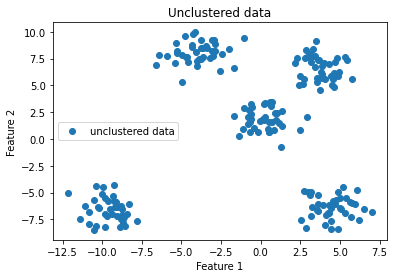

In [620]:
# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

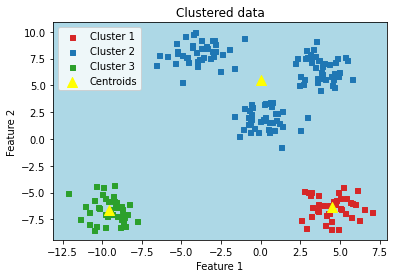

In [621]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

**Estimate**

In [630]:
y_pred, estimate_centroids = scratch_cluster_model.predict(X_val)

print("Cluster 1 data: \n{}\n".format(y_pred[1]))
print("Cluster 2 data: \n{}\n".format(y_pred[2]))
print("Cluster 3 data: \n{}\n".format(y_pred[3]))

Cluster 1 data: 
[[ 1.70279194 -1.62150251]
 [ 1.74047236 -1.47189613]
 [ 1.79853404 -1.34302442]
 [ 1.78299252 -1.68426538]
 [ 1.66384944 -1.49164366]
 [ 1.80857248 -1.54920273]
 [ 1.65365629 -1.45572806]]

Cluster 2 data: 
[[-0.94401457  0.27681842]
 [-0.37515955  0.19875711]
 [-0.93190155  1.32041417]
 [-0.18908144 -0.49051013]
 [-0.39926908  0.50602695]
 [-0.10615643  0.56543775]
 [-0.84111285  0.25945275]
 [-0.70850407  1.35583024]
 [-0.64357471  1.2339529 ]
 [-0.63632756  1.42927289]
 [-0.29245332  0.41917494]
 [-0.82737114  0.06594952]
 [-0.89463609  1.16895602]
 [-0.24598298  0.37113995]
 [-0.07044957  0.60276847]
 [ 0.05084709 -0.65097392]
 [-0.75689222  1.47375013]
 [-0.98083213  0.28151047]
 [-0.29710598  0.35504328]
 [-0.76299216  0.06671472]
 [-0.31154571  0.33605883]
 [-0.89371944  0.2683168 ]
 [-0.09263359 -0.79659935]]

Cluster 3 data: 
[]



**Ploting the clustering progress**

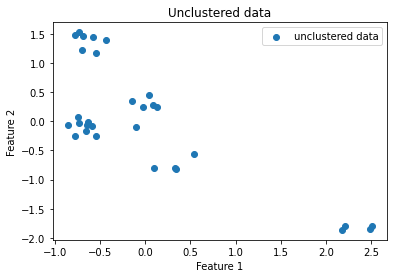

In [626]:
# Unclustered data
plt.scatter(X_val[:,0], X_val[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

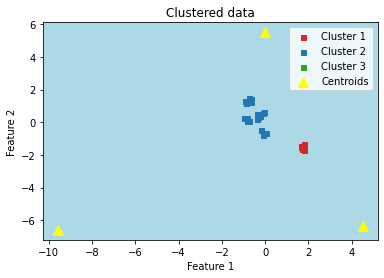

In [631]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(y_pred[k+1][:,0],
                y_pred[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(estimate_centroids[0,:],
            estimate_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

### **[Problem 8] Implementation of elbow method**

In [632]:
X_train, _ = make_blobs(n_samples=200, centers=5, random_state=101)

In [634]:
def elbow(X, K_min, K_max):
    """
    A function that select the best K value (number of clusters)

    """
    iter = 100
    n_init = 5
    tol = 1e-4

    sse_array=np.array([])

    for K in range (K_min, K_max):
        print("---------------\nNumber of clusters: {}".format(K))
        scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
        scratch_cluster_model.fit(X)
        output, centroids = scratch_cluster_model.cluster_output, scratch_cluster_model.cluster_centroid.T
        sse=0
        for k in range(K):
            sse+=np.sum((output[k+1]-centroids[k,:])**2)

        sse_array=np.append(sse_array,sse)

    return sse_array

In [635]:
K_min = 1
K_max = 11

sse_list = elbow(X_train, K_min, K_max)

---------------
Number of clusters: 1

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 2

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 3

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 4

Initial 0


Initial 1


Initial 2


Cluster division performed poorly! Skip this clustering . . .

Initial 3


Initial 4

---------------
Number of clusters: 5

Initial 0


Initial 1


Initial 2


Initial 3


Cluster division performed poorly! Skip this clustering . . .

Initial 4

---------------
Number of clusters: 6

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 7

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 8

Initial 0


Initial 1


Initial 2


Initial 3


Cluster division performed poorly! Skip this clustering . . .

Initial 4


Cluster division performed

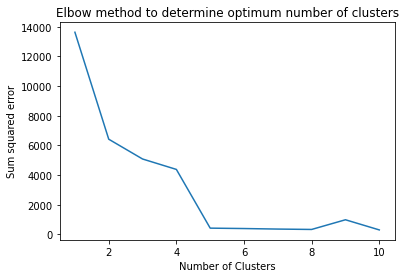

In [636]:
K_array=np.arange(1,11,1)
plt.plot(K_array,sse_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum squared error')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

From the elbow diagram, the number of clusters as 5 is the good one where its SSE reach it stablility.

**Wholesaler data analysis**

In [637]:
df_train = pd.read_csv('/content/wholesaler.csv')
print("Train dataset -- Rows: {}, Columns: {}".format(df_train.shape[0], df_train.shape[1]))

Train dataset -- Rows: 440, Columns: 8


In [638]:
df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


**Dimensionality reduction**

In [639]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_train)
df_pca = pca.transform(df_train)

In [642]:
print("Train dataset -- Rows: {}, Columns: {}".format(df_pca.shape[0], df_pca.shape[1]))
df_pd = pd.DataFrame(data=df_pca)
df_pd.head(10)

Train dataset -- Rows: 440, Columns: 2


,0,1
0,650.022120,1585.519107
1,-4426.804984,4042.451521
2,-4841.998710,2578.762188
3,990.346444,-6279.806002
4,10657.998731,-2159.725789
5,-2765.961593,-959.870712
6,-715.550892,-2013.002249
7,-4474.583669,1429.496985
8,-6712.095393,-2205.909168
9,-4823.634365,13480.559214


### **[Problem 10] Selection of the number of clusters k**

From the Problem 8, k = 5 is the good number of cluster and I choose it to use in the wholesaler dataset. Even though the number of cluster from 6 to 10 is also great in terms of reducing SSE, however, there will be a chance where our dataset is poorly divided into clusters (this have been verified by myself during the training progress). The reason for this incidient is because the dataset used does not have many samples, and sometimes the centroids are too far away from the other points, thus leading to the fact that one cluster may contains no points and our model will behave badly.

### **[Problem 11] Comparison with known groups**

In [644]:
K = 5
iter = 100
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(df_pca)


Initial 0


Initial 1


Initial 2


Initial 3


Initial 4


Initial 5


Cluster division performed poorly! Skip this clustering . . .

Initial 6


Initial 7


Initial 8


Initial 9



**Get the attribute**

In [645]:
best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: 5582.256400470285
Final centroids: 
[[37090.26268465 14537.71769494  8916.05498322 -6399.71175178
  -5607.91711162]
 [-5656.14398147 61715.67086327 -4762.41444013 -4169.29691651
  14199.18040566]]


In [653]:
output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))
print("Cluster 4 data: \n{}\n".format(output[4]))
print("Cluster 5 data: \n{}\n".format(output[5]))

Cluster 1 data: 
[[ 29261.09305186 -10083.33748179]
 [ 43223.09734624 -14003.59460677]
 [ 27289.52096846  -5807.65124441]
 [ 31824.24684535  -3533.84399592]
 [ 45183.31110792  -6064.93606068]
 [ 22959.5479775   -9515.31283977]
 [ 64420.95896356 -10008.46154864]
 [ 28445.07139282 -11650.85261542]
 [ 24535.96447711  -2970.18132169]
 [ 33479.99727264  -4851.30804844]
 [103863.42531408   9910.34970578]
 [ 37917.65920684  27331.45017477]
 [ 34406.70107658  -9531.13095261]
 [ 43188.25166183 -10714.10515765]
 [ 40054.81475678  -6198.80650931]
 [ 23806.38812867 -10093.57090395]
 [ 36189.83350738  -8606.29695799]
 [ 56664.56257376  -4286.04558876]
 [ 26303.48086626 -10053.34486187]
 [ 28596.4535738  -13062.3181926 ]
 [ 31007.11649126   6277.80043435]
 [ 26425.18741329  -7097.18870758]
 [ 25207.37050163  -9377.12118517]
 [ 25912.249956   -11757.64708926]]

Cluster 2 data: 
[[41411.3162558  65788.29791784]
 [30398.84065719 62369.37292431]
 [-8087.40662375 45950.83908297]
 [13653.67733503 99226.73

**Ploting the clustering progress**

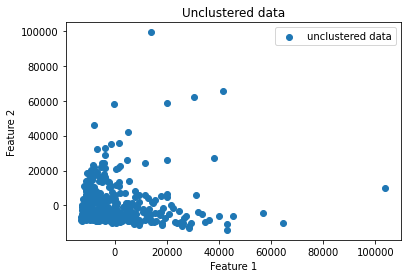

In [652]:
# Unclustered data
plt.scatter(df_pca[:,0], df_pca[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

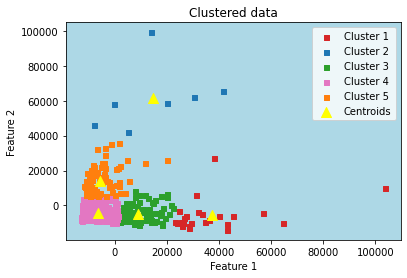

In [655]:
color = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:orange']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

### **[Problem 11] Comparison with known groups**

In [662]:
print("All region types: {}".format(df_train['Region'].unique()))
print("All channel types: {}".format(df_train['Channel'].unique()))

All region types: [3 1 2]
All channel types: [2 1]


In [677]:
df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


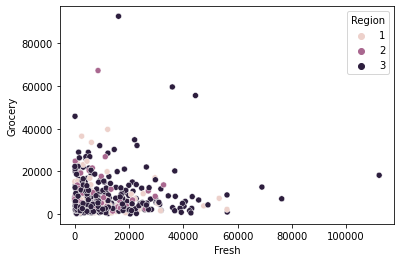

In [680]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Region")

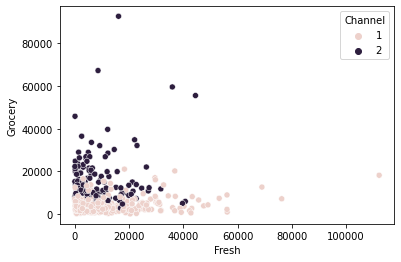

In [681]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Channel")

If we use only the known groups, it only show the distribution of data and theirs categorical target (in this case its either Region or Channel). The data is basically reduced by the PCA into the 2-dimensional data, but it still gives us an output, in which the graph has the same look of scatterplot drawn from the dataframe with 6 features. And, additionally, KMeans clustering does not even need the labels to group up the data.

This is how unsupervised model works.

### **[Problem 12] Useful information for wholesalers**

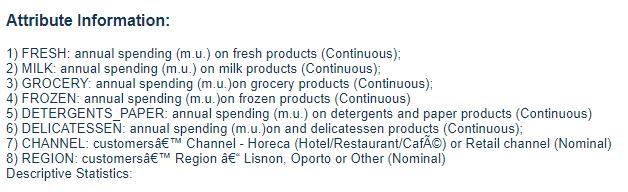

**For each region type**

Text(0.5, 1.0, 'Region 3')

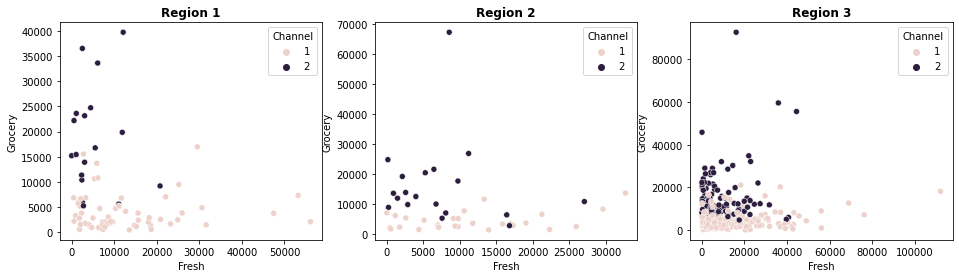

In [702]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
ax = axes[0]
sns.scatterplot(data=df_train[df_train.Region == 1], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 1', fontweight ="bold")

ax = axes[1]
sns.scatterplot(data=df_train[df_train.Region == 2], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 2', fontweight ="bold")

ax = axes[2]
sns.scatterplot(data=df_train[df_train.Region == 3], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 3', fontweight ="bold")

From the figures above, region 3 has the most number of customers having high annual pending on **grocery** and **fresh** products, and the annual spendings are also the highest among 3 regions. Meanwhile, in region 2, the annual spendings is not too high, but the variance of money amount spent on fresh product is great, where as the variance of money amount on grocery product is in a medium state. And in region, the variance of money amount for grocery product is higher than that of fresh products.